# **Ex2- Linear Regression, Naive Base, Decision Tree

## Names and IDs

1.   Lior Biton 209502079
2.   Coral Yagud 208635490

**Introduction**

This assignment will focus on the linear \ Logistic regression and Decision Trees.
There are two parts: Theoretical and Coding.

# Theoretical



## 1. Decision Tree (15 points)
You will be using a decision tree to classify whether an advertisement was clicked based on its size, position, and whether it played a sound.


1.	Assume that Position is chosen for the root of the decision tree. What is the information gain associated with this attribute? (8 points)
2.	Draw the full decision tree learned from this data (without any pruning). (7 points)

## 2. Naive Base (10 points)
For the same data Using Naïve Base what is the prediction of the new Sample $(big,Middle,No)$.

# 3. Understanding (16 points)
1.  Describe the analytical solution for linear regression with MSE as a distance function. (4 points)
2. What is the problem with information gain? Describe any solution for it. (4 points)
3. Why do we use Gradient Descent or Neotun Roffson for Linear Regression? (4 points)
4. Explain how a Decision tree is used for regression problems. (4 points)

# Code

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Titanic Dataset
The famous Titanic dataset includes 1309 passengers with nine attributes.
In the following question, we will use seven features to classify whether this passenger survived.  
Please use the given dataset and not from another source.

# 1.Logistic regression vs classification tree (19 Points)

Make the classification using  models Logistic regression and Decsion tree models.  
Usr sklearn: sklearn.linear_model.LogisticRegression, sklearn.tree.DecisionTreeClassifier

*   Load the data.
*   Deal with missing values. (5 points)
*   Split Train-Test 20:80 using sklearn.model_selection:train_test_split. (3 pints)
*   Apply Logistic regression. (5 points)
*   Apply Descion tree with max_depth=6 (5 points).
*   Calculate the Acuracey using  sklearn.metrics:accuracy_score. (1 points)


In [ ]:
#Load Data
data = pd.read_csv('/content/Titanic.csv')

In [ ]:
#Q1
df = data.copy()
# Check the number of missing values in each column
missing_values_count = df.isna().sum()
print(missing_values_count)

# drop rows with missing values
df.dropna(inplace=True)

# Split Train-Test 20:80
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic regression
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

# Apply Decision tree with max_depth=6
decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(X_train, y_train)

# Calculate the Accuracy
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
decision_tree_accuracy = accuracy_score(y_test, decision_tree_model.predict(X_test))

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)



Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          1
Pclass         2
Embarked       3
Survived       0
dtype: int64
Logistic Regression Accuracy: 0.8390804597701149
Decision Tree Accuracy: 0.8735632183908046


# 2.PreProning (15 Points)
For the same problem described above:
*   Find the best max depth in the range [1,8] of the decision tree using the function sklearn.model_selection.GridSearchCV.


In [ ]:
#Q2
# Define the parameter grid
param_grid = {'max_depth': range(1, 9)}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best max depth found
print("Best Max Depth:", grid_search.best_params_['max_depth'])

# Get the best model
best_decision_tree_model = grid_search.best_estimator_

# Calculate the Accuracy
best_decision_tree_accuracy = accuracy_score(y_test, best_decision_tree_model.predict(X_test))

print("Best Decision Tree Accuracy:", best_decision_tree_accuracy)

Best Max Depth: 4
Best Decision Tree Accuracy: 0.9042145593869731


# 3.Entropy vs Gini (10 Points)
For the same problem described above:

*   Use max_depth From question 2.
*   Train the model with Entropy. (5 points)
*   Train the model with Gini. (5 points)
*   Using Accuracy score who is better? (5 points)



In [ ]:
#Q3
# Train the model with Entropy
entropy_decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
entropy_decision_tree_model.fit(X_train, y_train)

# Train the model with Gini
gini_decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4)
gini_decision_tree_model.fit(X_train, y_train)

# Calculate the Accuracy for models trained with Entropy and Gini
entropy_accuracy = accuracy_score(y_test, entropy_decision_tree_model.predict(X_test))
gini_accuracy = accuracy_score(y_test, gini_decision_tree_model.predict(X_test))

print("Accuracy with Entropy:", entropy_accuracy)
print("Accuracy with Gini:", gini_accuracy)

# Determine which model is better based on accuracy score
if entropy_accuracy > gini_accuracy:
    print("Decision Tree with Entropy is better.")
elif gini_accuracy > entropy_accuracy:
    print("Decision Tree with Gini is better.")
else:
    print("Both models have the same accuracy.")

Accuracy with Entropy: 0.9080459770114943
Accuracy with Gini: 0.9042145593869731
Decision Tree with Entropy is better.


# 4. Gradient Descent (15 points)

* Assume we have $𝑓(𝑥,𝑦) = 𝑥^2/29+𝑦^2/64$
* Use gradient descent to find local minima, start at $(8.5,8.6)$
* Make 1000 Iteration.

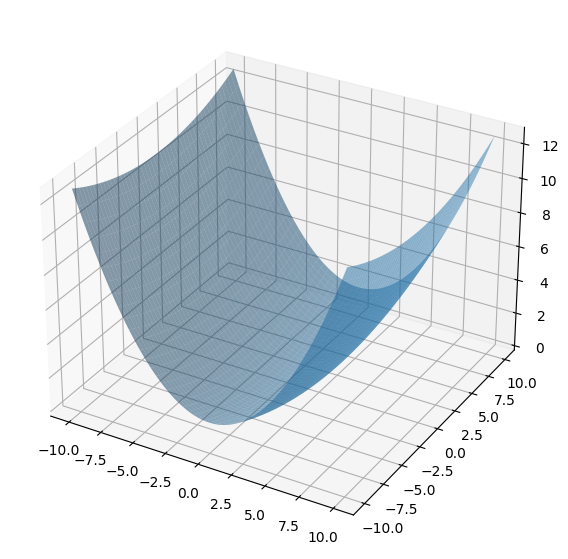

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x,y):
  return np.power(x,2)/9 + np.power(y,2)/64

x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt. figure(figsize=(7, 7))
ax = plt.axes (projection='3d' )
ax. plot_surface(X, Y, Z, alpha=0.5)

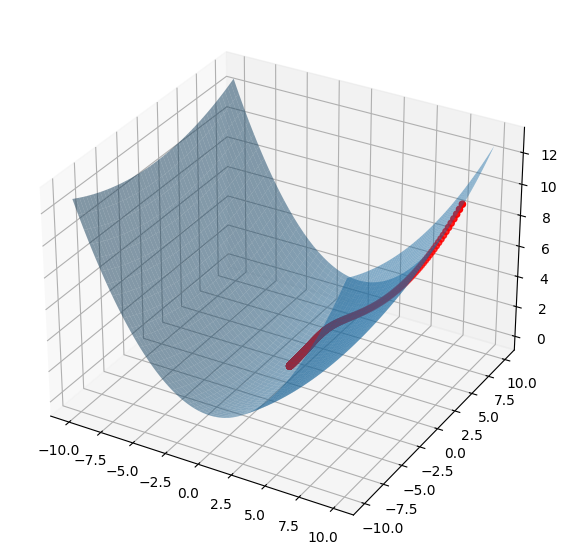

Local minimum point: [1.47768422e-09 3.76013284e-01]


In [ ]:
#Q4
def gradient(x, y):
    return np.array([2 * x / 9, 2 * y / 64])

# Initialize starting point and learning rate
start_point = np.array([8.5, 8.6])
learning_rate = 0.1
way = [start_point]

# Perform gradient descent
for i in range(1000):
    grad = gradient(*start_point)
    start_point = start_point - learning_rate * grad
    way.append(start_point)

way = np.array(way)

# Plot the way
x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.scatter(way[:, 0], way[:, 1], func(*way.T), color='red')
plt.show()

# Print the final point
print("Local minimum point:", start_point)